<a href="https://colab.research.google.com/github/bsesay6/Data-project1/blob/main/Capstone_Project_Data_Science_Bai_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required python libaries

from pandas import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# DATA OVERVIEW

#This dataset provides information on motor vehicle operators (drivers) involved in traffic collisions occurring on county and local roadways. 
#The dataset reports details of all traffic collisions occurring on county and local roadways within Montgomery County, 
#as collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, 
#and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, 
#or the Maryland-National Capital Park Police. 
#This dataset shows each collision data recorded and the drivers involved.

#DEFINATION OF FILES IN THE DATASET

#Report Numbere
#ACRS: Report Number assigned to the incident.

#Local Case Number:
#Case number from the local investigating agency for the incident.

#Agency Name:
#Name of the investigating agency.

#ACRS Report Typpe:
#Identifies crash as property, injury, or fatal.

#Crash Date/Time:
#Date and Time of crash.

#Route Type:
#Type of roadway at crash location.

#Road Name:
#Name of road.

#Collision Type	
#Type of collision.

#Weather:
#Weather at collision location.


In [ ]:
#Questions I am Curious to know in this Project

#1. WHAT POLICE DEPARTMENT HAVE THE MOST REPORTED CAR CRASH

#2. WHAT DAY OF WEEK MOST CREASHES OCCURED

#3. wHAT DAY OF THE MONTH MOST CRASHES OCCURED?

#4. WHAT ARE THE MOST REPORTED CAR CRASH DAMAGE?

#5. IN WHAT WHEATHER MOST CRASHES OCCURED?

#6. WHAT ROUTES (ROAD) MOST CRASES OCCURES?

#7. WHAT ROUTE TYPE MOST FATAL CRASES OCCURED?


In [ ]:
#Readig/uploading the dataset
df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv", parse_dates=["Crash Date/Time"])

<ipython-input-6-0cd579ce467f>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv", parse_dates=["Crash Date/Time"])


In [ ]:
#Brief display of the dataset
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,2019-09-26 07:20:00,NaN,NaN,NaN,NaN,PARKING LOT,...,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,NaN,...,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,2021-09-08 12:30:00,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,0,No,No,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"


In [ ]:
df['day_name']=df['Crash Date/Time'].dt.day_name()
df['month_name']=df['Crash Date/Time'].dt.month_name()



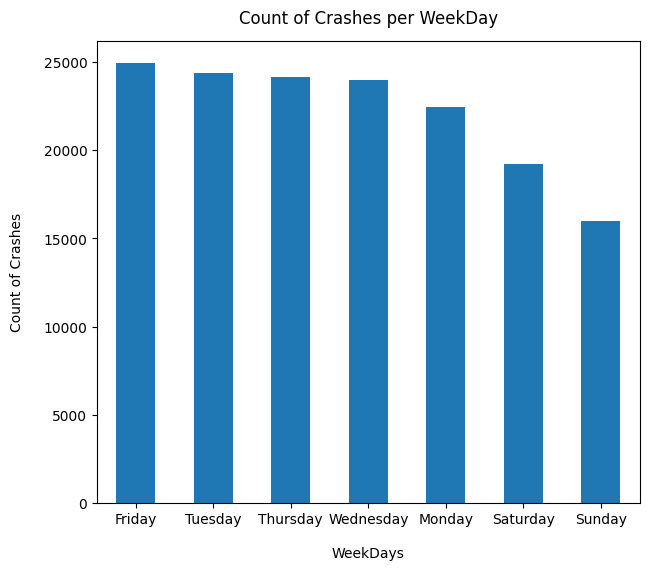

In [ ]:
df['day_name'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("WeekDays", labelpad=14)
plt.ylabel("Count of Crashes", labelpad=14)
plt.title("Count of Crashes per WeekDay", y=1.02);

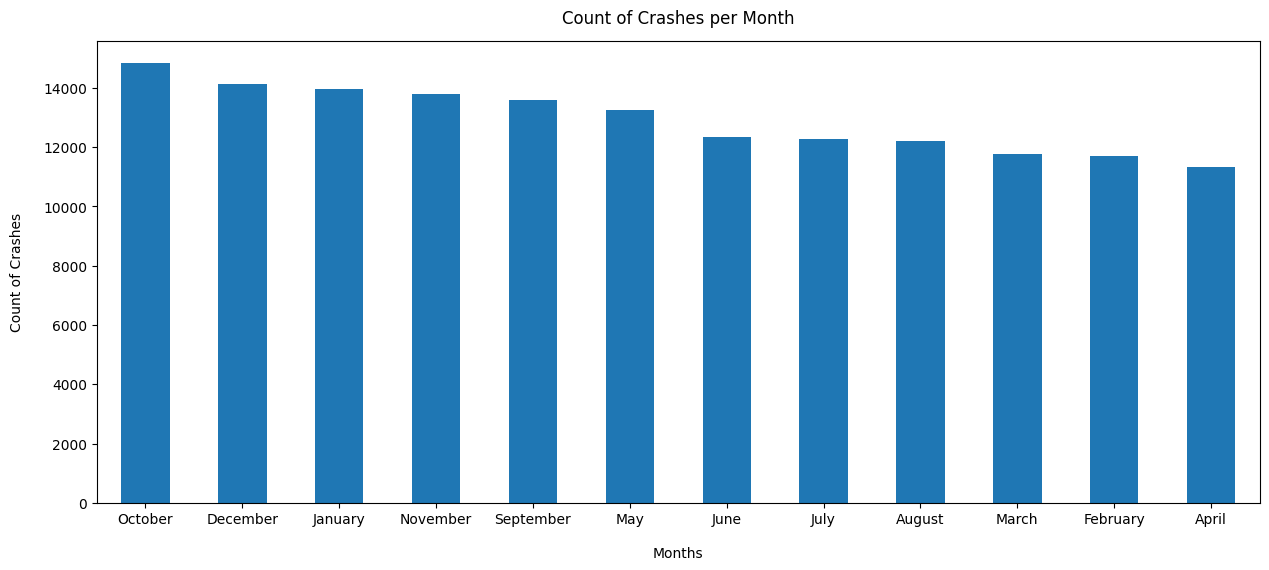

In [ ]:
df['month_name'].value_counts().plot(kind='bar', figsize=(15, 6), rot=0)
plt.xlabel("Months", labelpad=14)
plt.ylabel("Count of Crashes", labelpad=14)
plt.title("Count of Crashes per Month", y=1.02);

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 67.2 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [ ]:
# coverting csv to geopandas dataframe
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, crs = crs, geometry = geometry)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
import datetime
from datetime import datetime 

gdf['day_name']=gdf['Crash Date/Time'].dt.day_name()
gdf['month_name']=gdf['Crash Date/Time'].dt.month_name()


In [ ]:
gdf

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,day_name,month_name,geometry
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,2019-09-26 07:20:00,NaN,NaN,NaN,NaN,PARKING LOT,...,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)",Thursday,September,POINT (-77.15767 39.10352)
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,NaN,...,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)",Thursday,June,POINT (-77.27124 39.15485)
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,2021-09-08 12:30:00,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)",Wednesday,September,POINT (-77.01144 39.02030)
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)",Sunday,April,POINT (-77.09785 39.08006)
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)",Monday,April,POINT (-77.24109 39.17523)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155102,EJ7895003P,230006967,Gaithersburg Police Depar,Injury Crash,2023-02-11 12:20:00,Maryland (State),FREDERICK RD,Maryland (State),MONTGOMERY VILLAGE AVE,NaN,...,2008,JEEP,GRAND CHEROKEE,NO MISUSE,39.153060,-77.212446,"(39.15305963, -77.21244582)",Saturday,February,POINT (-77.21245 39.15306)
155103,MCP3256001W,230007342,Montgomery County Police,Property Damage Crash,2023-02-13 17:34:00,US (State),COLUMBIA PIKE,County,STEWART LA,NaN,...,2015,ACURA,4D,NO MISUSE,39.047619,-76.985333,"(39.04761916, -76.98533295)",Monday,February,POINT (-76.98533 39.04762)
155104,MCP2780006H,23006864,Montgomery County Police,Property Damage Crash,2023-02-10 16:50:00,Maryland (State),FREDERICK RD,Maryland (State),RIDGE RD,NaN,...,2017,GILLIG,40' DIESEL,NO MISUSE,39.205259,-77.246008,"(39.20525933, -77.24600817)",Friday,February,POINT (-77.24601 39.20526)
155105,EJ78520074,230005655,Gaithersburg Police Depar,Property Damage Crash,2022-12-03 15:20:00,Interstate (State),EISENHOWER MEMORIAL HWY,Ramp,RAMP 3 FR SHADY GROVE RD EB TO IS 270 NB,NaN,...,2021,LEXUS,SEDAB,NaN,39.109508,-77.188336,"(39.10950777, -77.18833634)",Saturday,December,POINT (-77.18834 39.10951)


<Axes: >

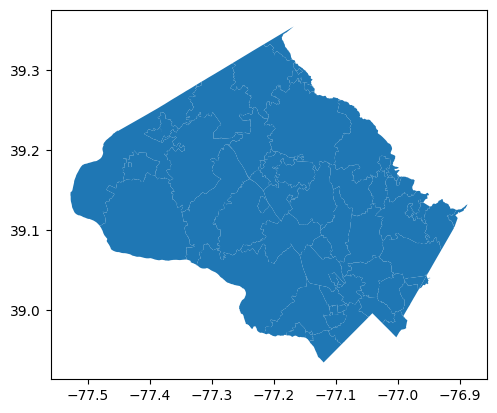

In [ ]:
mc_county_map = gpd.read_file("geo_export_c9be7330-1ad1-4a92-9c4f-7c033e687bfc.shp")
#mc_county_map.plot()
mc_county_map.to_crs(epsg=4326).plot()

Text(0.5, 1.0, 'MC County Crashes ')

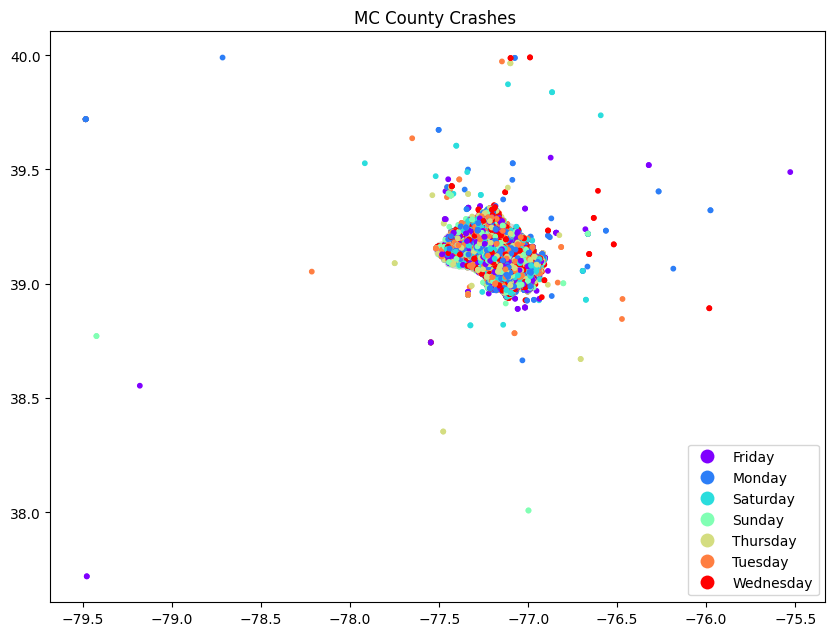

In [ ]:
fig, ax = plt.subplots(figsize = (10,100))
mc_county_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf.plot(column = 'day_name', ax=ax, cmap = 'rainbow',
            legend = True, 
            markersize = 10)
ax.set_title('MC County Crashes ')

Text(0.5, 1.0, 'MC County Crashes ')

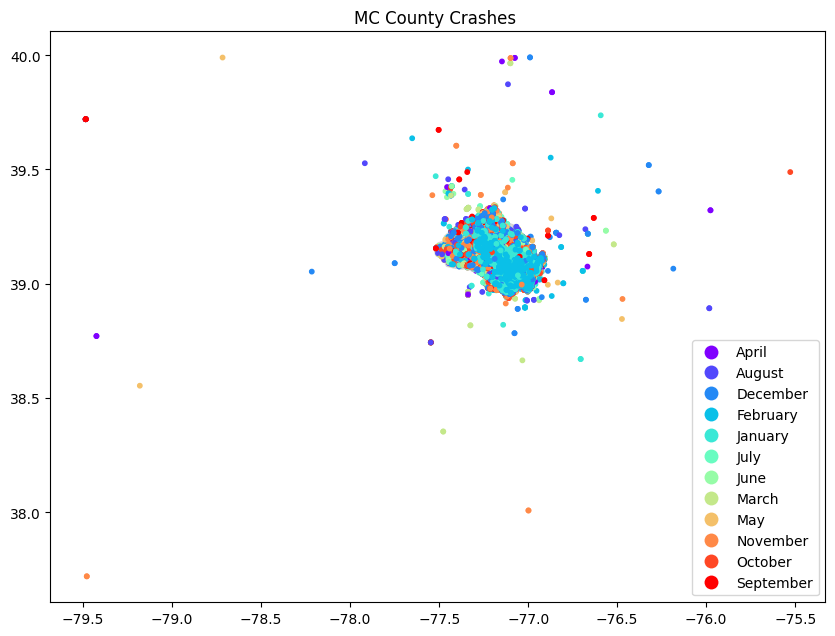

In [ ]:
fig, ax = plt.subplots(figsize = (10,100))
mc_county_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf.plot(column = 'month_name', ax=ax, cmap = 'rainbow',
            legend = True, 
            markersize = 10)
ax.set_title('MC County Crashes ')


![image](https://montgomeryplanning.org/wp-content/uploads/2020/08/Planning_Teams_2020_web.jpg) 
    

In [ ]:
mc_county_map

,mail_city,shape_area,shape_leng,zipcode,geometry
0,GLEN ECHO,9.810937e+06,14504.506513,20812.0,"POLYGON ((-77.14304 38.97167, -77.14287 38.971..."
1,BETHESDA,1.175655e+08,58716.124845,20816.0,"MULTIPOLYGON (((-77.13907 38.96881, -77.13927 ..."
2,CABIN JOHN,3.599683e+07,31103.235156,20818.0,"POLYGON ((-77.15861 38.98484, -77.15859 38.984..."
3,BETHESDA,2.547457e+04,1298.401522,20894.0,"POLYGON ((-77.09628 38.99378, -77.09625 38.993..."
4,BETHESDA,7.448763e+02,140.742936,20892.0,"POLYGON ((-77.09646 38.99533, -77.09643 38.995..."
...,...,...,...,...,...
92,BOYDS,7.723518e+08,250533.236842,20841.0,"POLYGON ((-77.31723 39.24505, -77.31713 39.244..."
93,GERMANTOWN,3.258196e+08,135940.688675,20876.0,"POLYGON ((-77.22903 39.25282, -77.22884 39.252..."
94,BROOKEVILLE,5.585343e+08,207931.092330,20833.0,"POLYGON ((-77.09291 39.26237, -77.09266 39.261..."
95,DICKERSON,1.131929e+09,357054.654503,20842.0,"POLYGON ((-77.32546 39.27755, -77.32559 39.277..."


In [ ]:
#listing null values
df.isnull()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,day_name,month_name,geometry
0,False,False,False,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155102,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
155103,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
155104,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
155105,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
#Displaying dataFrame
df

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,day_name,month_name,geometry
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,2019-09-26 07:20:00,NaN,NaN,NaN,NaN,PARKING LOT,...,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)",Thursday,September,POINT (-77.15767 39.10352)
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,NaN,...,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)",Thursday,June,POINT (-77.27124 39.15485)
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,2021-09-08 12:30:00,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)",Wednesday,September,POINT (-77.01144 39.02030)
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)",Sunday,April,POINT (-77.09785 39.08006)
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)",Monday,April,POINT (-77.24109 39.17523)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155102,EJ7895003P,230006967,Gaithersburg Police Depar,Injury Crash,2023-02-11 12:20:00,Maryland (State),FREDERICK RD,Maryland (State),MONTGOMERY VILLAGE AVE,NaN,...,2008,JEEP,GRAND CHEROKEE,NO MISUSE,39.153060,-77.212446,"(39.15305963, -77.21244582)",Saturday,February,POINT (-77.21245 39.15306)
155103,MCP3256001W,230007342,Montgomery County Police,Property Damage Crash,2023-02-13 17:34:00,US (State),COLUMBIA PIKE,County,STEWART LA,NaN,...,2015,ACURA,4D,NO MISUSE,39.047619,-76.985333,"(39.04761916, -76.98533295)",Monday,February,POINT (-76.98533 39.04762)
155104,MCP2780006H,23006864,Montgomery County Police,Property Damage Crash,2023-02-10 16:50:00,Maryland (State),FREDERICK RD,Maryland (State),RIDGE RD,NaN,...,2017,GILLIG,40' DIESEL,NO MISUSE,39.205259,-77.246008,"(39.20525933, -77.24600817)",Friday,February,POINT (-77.24601 39.20526)
155105,EJ78520074,230005655,Gaithersburg Police Depar,Property Damage Crash,2022-12-03 15:20:00,Interstate (State),EISENHOWER MEMORIAL HWY,Ramp,RAMP 3 FR SHADY GROVE RD EB TO IS 270 NB,NaN,...,2021,LEXUS,SEDAB,NaN,39.109508,-77.188336,"(39.10950777, -77.18833634)",Saturday,December,POINT (-77.18834 39.10951)


In [ ]:
#Extracting fields from the dataset
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location', 'day_name', 'month_name', 'geometry'],
      dtype='object')

In [ ]:
#Selecting Specific fields
df_subset = df [['Report Number','Agency Name',
       'ACRS Report Type',
       'Crash Date/Time','Route Type','Road Name','Municipality',
       'Related Non-Motorist','Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Location']]
df_subset

,Report Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Municipality,Related Non-Motorist,Collision Type,Weather,...,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Location
0,DD5620004G,Rockville Police Departme,Property Damage Crash,2019-09-26 07:20:00,NaN,NaN,NaN,NaN,SINGLE VEHICLE,CLEAR,...,NaN,NONE DETECTED,NaN,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,940390C5-2D67-4B95-BCE3-FDF38AA42ECD,"(39.10351817, -77.15766933)"
1,MCP29620057,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,NaN,NaN,OTHER,CLOUDY,...,NaN,UNKNOWN,NaN,Yes,NO APPARENT INJURY,NaN,UNKNOWN,XX,796D6E97-FC6F-4CB5-BCC0-E77F10D6220D,"(39.15484667, -77.271245)"
2,MCP2651004P,Montgomery County Police,Property Damage Crash,2021-09-08 12:30:00,NaN,NaN,NaN,NaN,OTHER,CLEAR,...,NaN,NaN,NaN,Yes,NO APPARENT INJURY,NaN,UNKNOWN,NaN,C05DE6D9-EA1E-4736-A29C-A08B2EC10629,"(39.02030267, -77.01143583)"
3,MCP3050004K,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,NaN,NaN,OTHER,CLEAR,...,NO CONTROLS,ALCOHOL PRESENT,NaN,Yes,NO APPARENT INJURY,NaN,UNKNOWN,MD,06DEBB17-3C98-421B-A368-8578A48773B2,"(39.08006167, -77.097845)"
4,MCP2641001J,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,NaN,NaN,OTHER,CLOUDY,...,NO CONTROLS,NONE DETECTED,NaN,Yes,POSSIBLE INJURY,NaN,UNKNOWN,MD,5146C181-7BFF-41CB-ADB8-8AFECD67FCD1,"(39.17523, -77.24109)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155102,EJ7895003P,Gaithersburg Police Depar,Injury Crash,2023-02-11 12:20:00,Maryland (State),FREDERICK RD,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,...,TRAFFIC SIGNAL,NONE DETECTED,NaN,Yes,NO APPARENT INJURY,NaN,BY OTHER OCCUPANTS,MD,9271D2BC-38FD-4C1F-8B14-147EC7545568,"(39.15305963, -77.21244582)"
155103,MCP3256001W,Montgomery County Police,Property Damage Crash,2023-02-13 17:34:00,US (State),COLUMBIA PIKE,NaN,NaN,SAME DIR REAR END,CLEAR,...,TRAFFIC SIGNAL,NONE DETECTED,NaN,Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,MD,DB82F942-3E34-4D04-8A69-9B6CE90D12D2,"(39.04761916, -76.98533295)"
155104,MCP2780006H,Montgomery County Police,Property Damage Crash,2023-02-10 16:50:00,Maryland (State),FREDERICK RD,NaN,NaN,SAME DIR BOTH LEFT TURN,CLOUDY,...,TRAFFIC SIGNAL,NaN,NaN,Yes,NO APPARENT INJURY,NaN,LOOKED BUT DID NOT SEE,MD,15D1C435-5D94-4874-B6B8-701385AE3AA9,"(39.20525933, -77.24600817)"
155105,EJ78520074,Gaithersburg Police Depar,Property Damage Crash,2022-12-03 15:20:00,Interstate (State),EISENHOWER MEMORIAL HWY,NaN,NaN,STRAIGHT MOVEMENT ANGLE,NaN,...,TRAFFIC SIGNAL,UNKNOWN,NaN,Unknown,NO APPARENT INJURY,NaN,UNKNOWN,NaN,B93D849E-133E-4255-ABB3-34EF34BCCF06,"(39.10950777, -77.18833634)"


In [ ]:
#Displaying total missing values
df.isnull().sum()

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         15176
Road Name                          14351
Cross-Street Type                  15200
Cross-Street Name                  14356
Off-Road Description              140758
Municipality                      137880
Related Non-Motorist              150227
Collision Type                       516
Weather                            12195
Surface Condition                  18208
Light                               1288
Traffic Control                    23386
Driver Substance Abuse             28186
Non-Motorist Substance Abuse      151238
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      126449
Driver Distracted By                   0
Drivers License 

In [ ]:
#Filling missing values with the "bfill Method"
df = df.fillna(df.mean())

<ipython-input-34-850077bf98bd>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
<ipython-input-34-850077bf98bd>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
#Creating a new dataframe after replacing missing values using the "bfill" method
#The "bfill" uses the value before the null field to replace the null value.
df

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,day_name,month_name,geometry
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,2019-09-26 07:20:00,NaN,NaN,NaN,NaN,PARKING LOT,...,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)",Thursday,September,POINT (-77.15767 39.10352)
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,2020-06-18 02:00:00,County,DAIRYMAID DR,County,METZ DR,NaN,...,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)",Thursday,June,POINT (-77.27124 39.15485)
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,2021-09-08 12:30:00,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)",Wednesday,September,POINT (-77.01144 39.02030)
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,2020-04-19 15:39:00,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)",Sunday,April,POINT (-77.09785 39.08006)
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,2020-04-20 09:15:00,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)",Monday,April,POINT (-77.24109 39.17523)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155102,EJ7895003P,230006967,Gaithersburg Police Depar,Injury Crash,2023-02-11 12:20:00,Maryland (State),FREDERICK RD,Maryland (State),MONTGOMERY VILLAGE AVE,NaN,...,2008,JEEP,GRAND CHEROKEE,NO MISUSE,39.153060,-77.212446,"(39.15305963, -77.21244582)",Saturday,February,POINT (-77.21245 39.15306)
155103,MCP3256001W,230007342,Montgomery County Police,Property Damage Crash,2023-02-13 17:34:00,US (State),COLUMBIA PIKE,County,STEWART LA,NaN,...,2015,ACURA,4D,NO MISUSE,39.047619,-76.985333,"(39.04761916, -76.98533295)",Monday,February,POINT (-76.98533 39.04762)
155104,MCP2780006H,23006864,Montgomery County Police,Property Damage Crash,2023-02-10 16:50:00,Maryland (State),FREDERICK RD,Maryland (State),RIDGE RD,NaN,...,2017,GILLIG,40' DIESEL,NO MISUSE,39.205259,-77.246008,"(39.20525933, -77.24600817)",Friday,February,POINT (-77.24601 39.20526)
155105,EJ78520074,230005655,Gaithersburg Police Depar,Property Damage Crash,2022-12-03 15:20:00,Interstate (State),EISENHOWER MEMORIAL HWY,Ramp,RAMP 3 FR SHADY GROVE RD EB TO IS 270 NB,NaN,...,2021,LEXUS,SEDAB,NaN,39.109508,-77.188336,"(39.10950777, -77.18833634)",Saturday,December,POINT (-77.18834 39.10951)


In [ ]:
#Checking for null values in all the fields in the dataset
df.isna().sum()

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         15176
Road Name                          14351
Cross-Street Type                  15200
Cross-Street Name                  14356
Off-Road Description              140758
Municipality                      137880
Related Non-Motorist              150227
Collision Type                       516
Weather                            12195
Surface Condition                  18208
Light                               1288
Traffic Control                    23386
Driver Substance Abuse             28186
Non-Motorist Substance Abuse      151238
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      126449
Driver Distracted By                   0
Drivers License 

In [ ]:
#Brief discription of the dataset
df.describe()

,Speed Limit,Vehicle Year,Latitude,Longitude
count,155107.000000,155107.000000,155107.000000,155107.000000
mean,32.645335,1966.630146,39.082840,-77.112181
std,11.062730,338.808979,0.072169,0.098826
min,0.000000,0.000000,37.720000,-79.486000
25%,30.000000,2005.000000,39.024059,-77.188690
50%,35.000000,2011.000000,39.074713,-77.105058
75%,40.000000,2015.000000,39.138951,-77.039530
max,70.000000,9999.000000,39.990414,-75.527708


In [ ]:
#printing out all fields and their associated variables
df.dtypes

Report Number                             object
Local Case Number                         object
Agency Name                               object
ACRS Report Type                          object
Crash Date/Time                   datetime64[ns]
Route Type                                object
Road Name                                 object
Cross-Street Type                         object
Cross-Street Name                         object
Off-Road Description                      object
Municipality                              object
Related Non-Motorist                      object
Collision Type                            object
Weather                                   object
Surface Condition                         object
Light                                     object
Traffic Control                           object
Driver Substance Abuse                    object
Non-Motorist Substance Abuse              object
Person ID                                 object
Driver At Fault     

In [ ]:
#Dsiplaying all agencies with their number of reported crash cases
pd.DataFrame(df['Agency Name'].value_counts())

,Agency Name
Montgomery County Police,123818
MONTGOMERY,10659
Rockville Police Departme,8837
Gaithersburg Police Depar,6814
Takoma Park Police Depart,2677
Maryland-National Capital,1048
ROCKVILLE,630
GAITHERSBURG,390
TAKOMA,157
MCPARK,77


In [ ]:
#Visaualing the result on a bar chart
pd.DataFrame(new_df['Agency Name'].value_counts()).plot(kind='bar',figsize=(10,5))

NameError: ignored

In [ ]:
#The total number of crahes for each crash Report type
pd.DataFrame(df['ACRS Report Type'].value_counts())

In [ ]:
#Visualizing the varies crash reported cases
pd.DataFrame(df['ACRS Report Type'].value_counts()).plot(kind='bar',figsize=(10,5))

In [ ]:
#displaying the % of  the varies reported crash cases
pd.DataFrame(df['ACRS Report Type'].value_counts()).plot(kind='pie',figsize=(5,5),subplots=True,autopct='%1.1f%%')

In [ ]:
#Displaying the varies 
pd.DataFrame(df['Route Type'].value_counts())

In [ ]:
pd.DataFrame(df['Route Type'].value_counts()).plot(kind='bar',figsize=(10,5))

In [ ]:
pd.DataFrame(df['Weather'].value_counts())

In [ ]:
pd.DataFrame(df['Weather'].value_counts()).plot(kind='bar',figsize=(10,5))